# Part I - (Prosper Loan dataset)
## Marah Salahat

## Introduction

# Prosper Loan Dataset Exploration

This notebook explores the Prosper Loan dataset, which contains information about more than 113,000 loans issued through the Prosper peer-to-peer lending platform.  

The goal of this exploratory data analysis is to understand:
- What are the main characteristics of Prosper loans?
- How do borrower features relate to loan outcomes?
- Which factors may influence loan performance and investor decisions?


## Preliminary Wrangling

In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




def annotate_mean(ax, series, orient='v', label='mean'):
    s = series.dropna()
    if s.empty:
        return
    mean_val = s.mean()
    if orient == 'v':
        ax.axvline(mean_val, linestyle='--', linewidth=1)
        ax.text(mean_val, ax.get_ylim()[1]*0.95, f'{label}: {mean_val:.2f}',
                rotation=90, verticalalignment='top', fontsize=9)
    else:
        ax.axhline(mean_val, linestyle='--', linewidth=1)
        ax.text(ax.get_xlim()[1]*0.95, mean_val, f'{label}: {mean_val:.2f}',
                horizontalalignment='right', verticalalignment='bottom', fontsize=9)

def safe_show():
    plt.tight_layout()
    plt.show()


In [2]:
df= pd.read_csv("prosperLoanData.csv")

In [8]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
df.shape

(113937, 81)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Data Overview
- The dataset contains 113,937 rows and 81 columns.
- Each row represents a unique loan.
- Key features include:
  - **BorrowerAPR, BorrowerRate, CreditGrade** → borrower credit quality
  - **LoanOriginalAmount, MonthlyLoanPayment** → loan amount and payment
  - **LoanStatus** → current loan outcome
  - **Investors** → number of investors in each loan


In [11]:

numeric_cols = [
    'LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
    'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors', 'PercentFunded',
    'LP_NetPrincipalLoss', 'LoanCurrentDaysDelinquent'
]
cat_cols = ['CreditGrade', 'LoanStatus', 'IncomeRange', 'Term', 'ProsperRating (Alpha)']




### What is the structure of your dataset?
The Prosper Loan dataset contains information on over **113,000 loans** made through the **Prosper peer-to-peer lending platform**.  
Each row represents a **unique loan listing**, and the dataset includes **81 columns** describing borrower attributes, loan characteristics, and performance outcomes.  

The variables include:
- **Numeric features** such as `BorrowerRate`, `LoanOriginalAmount`, `StatedMonthlyIncome`, and `DebtToIncomeRatio`.
- **Categorical features** such as `EmploymentStatus`, `IncomeRange`, `LoanStatus`, and `ProsperRating (Alpha)`.

The dataset contains some missing values in several columns (e.g., credit ratings, borrower employment info) due to differences across Prosper’s loan periods.

---

### What is/are the main feature(s) of interest in your dataset?
The main feature of interest is the **`BorrowerRate`**, which represents the **interest rate** assigned to a borrower’s loan.  
Understanding how this rate varies across different borrower and loan characteristics can provide insights into **lending risk, borrower profiles, and Prosper’s credit assessment system**.

---

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
To explore what influences the `BorrowerRate`, several variables are expected to be informative:
- **Borrower’s credit quality:** `ProsperRating (Alpha)` and `ProsperScore`
- **Loan characteristics:** `LoanOriginalAmount`, `LoanTerm`, and `ListingCategory (numeric)`
- **Borrower financial information:** `DebtToIncomeRatio`, `StatedMonthlyIncome`, and `IncomeRange`
- **Employment details:** `EmploymentStatus` and `Occupation`
- **Loan outcome variables (optional for context):** `LoanStatus` and `LenderYield`

These features together help determine how borrower demographics, credit ratings, and financial stability affect the assigned loan interest rates.


In [12]:

# Missing values 
missing = df.isnull().sum()
missing = missing[missing > 0]
print('\nColumns with missing values (count):')
display(missing)


Columns with missing values (count):


CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

In [13]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing.head(15)

GroupKey                               88.290898
LoanFirstDefaultedCycleNumber          85.121602
ScorexChangeAtTimeOfListing            83.387311
ProsperPaymentsOneMonthPlusLate        80.616481
TotalProsperLoans                      80.616481
ProsperPaymentsLessThanOneMonthLate    80.616481
ProsperPrincipalBorrowed               80.616481
TotalProsperPaymentsBilled             80.616481
OnTimeProsperPayments                  80.616481
ProsperPrincipalOutstanding            80.616481
CreditGrade                            74.588588
ClosedDate                             51.649596
ProsperRating (numeric)                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
dtype: float64

- Columns like `CreditGrade`, `ClosedDate`, and some credit score metrics have a high percentage of missing values.
- We will focus on cleaning key analytical columns such as `BorrowerAPR`, `LoanOriginalAmount`, `LoanStatus`, and `CreditGrade`.

In [14]:
## Check for duplicates
df.duplicated().sum()

np.int64(0)

- No Duplicates.

## Data Cleaning

Before performing exploratory analysis, it’s essential to clean and prepare the data to ensure accuracy.

The main cleaning steps performed include:
- Converting date columns to datetime format.
- Handling missing values in key features.
- Checking for inconsistent or invalid entries.
- Creating any additional derived features if needed.


In [15]:
# Convert date-like columns to datetime
date_cols = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled',
             'FirstRecordedCreditLine', 'LoanOriginationDate']
for c in date_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

### Date Conversion
Date columns were converted into datetime format to allow for future time-based analysis, such as loan origination trends or durations.


In [16]:
# Keep only useful columns
keep_cols = [
    'BorrowerAPR', 'BorrowerRate', 'CreditGrade', 'ProsperRating (Alpha)', 'LoanOriginalAmount',
    'LoanStatus', 'Term', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors',
    'LoanOriginationDate', 'ClosedDate', 'BorrowerState', 'IncomeRange'
]
df = df[keep_cols].copy()

print("Remaining columns:", df.shape[1])


Remaining columns: 14


### Feature Selection
Since the dataset has 81 columns, I kept only those most relevant to loan characteristics, borrower risk, and outcomes.  
This reduces noise and focuses the analysis on meaningful variables.


In [17]:
# --- 1. Handle categorical missing values intelligently ---
df['CreditGrade'] = np.where(df['CreditGrade'].isna(), df['ProsperRating (Alpha)'], df['CreditGrade'])
df['CreditGrade'] = df['CreditGrade'].fillna('NotAvailable')
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].fillna('NotAvailable')
df['IncomeRange'] = df['IncomeRange'].fillna('Not Disclosed')
df['BorrowerState'] = df['BorrowerState'].fillna('Not Disclosed')

# --- 2. Handle numeric missing values with median by group ---
if 'StatedMonthlyIncome' in df.columns:
    df['StatedMonthlyIncome'] = df.groupby('CreditGrade')['StatedMonthlyIncome']\
                                  .transform(lambda x: x.fillna(x.median()))

# Drop only critical missing APR or LoanAmount
df = df.dropna(subset=['BorrowerAPR', 'LoanOriginalAmount'])

# --- 3. Handle dates & derive duration ---
for c in ['LoanOriginationDate', 'ClosedDate']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df['LoanDurationDays'] = (df['ClosedDate'] - df['LoanOriginationDate']).dt.days
df['LoanDurationDays'] = df['LoanDurationDays'].fillna(0)

# --- 4. Outlier trimming remains ---
df = df[df['BorrowerAPR'] < 1]
df = df[df['LoanOriginalAmount'] <= df['LoanOriginalAmount'].quantile(0.99)]
df = df[df['StatedMonthlyIncome'] <= df['StatedMonthlyIncome'].quantile(0.99)]

df.isna().sum()


BorrowerAPR                  0
BorrowerRate                 0
CreditGrade                  0
ProsperRating (Alpha)        0
LoanOriginalAmount           0
LoanStatus                   0
Term                         0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
Investors                    0
LoanOriginationDate          0
ClosedDate               57560
BorrowerState                0
IncomeRange                  0
LoanDurationDays             0
dtype: int64

## Univariate Exploration



**Question:** What is the general distribution of Borrower APRs?  
**Visualization:** Histogram of BorrowerAPR  


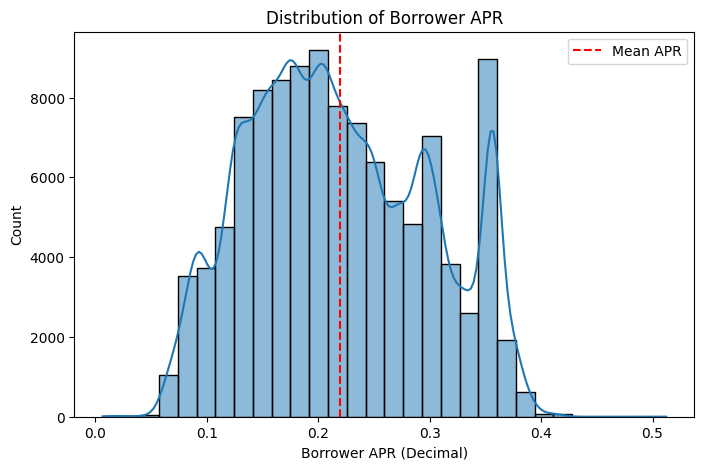

In [18]:
# Polished Histogram 
plt.figure(figsize=(8, 5))
sns.histplot(df['BorrowerAPR'], bins=30, kde=True)
plt.axvline(df['BorrowerAPR'].mean(), color='red', linestyle='--', label='Mean APR')
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR (Decimal)')
plt.ylabel('Count')
plt.legend()
plt.show()

**Observation:** The distribution is right-skewed. Most loans have APRs between 0.1 and 0.2, while a few have very high APRs above 0.3, indicating higher-risk borrowers.



**Question:** Which loan outcomes are most common?  
**Visualization:** Count plot of LoanStatus  


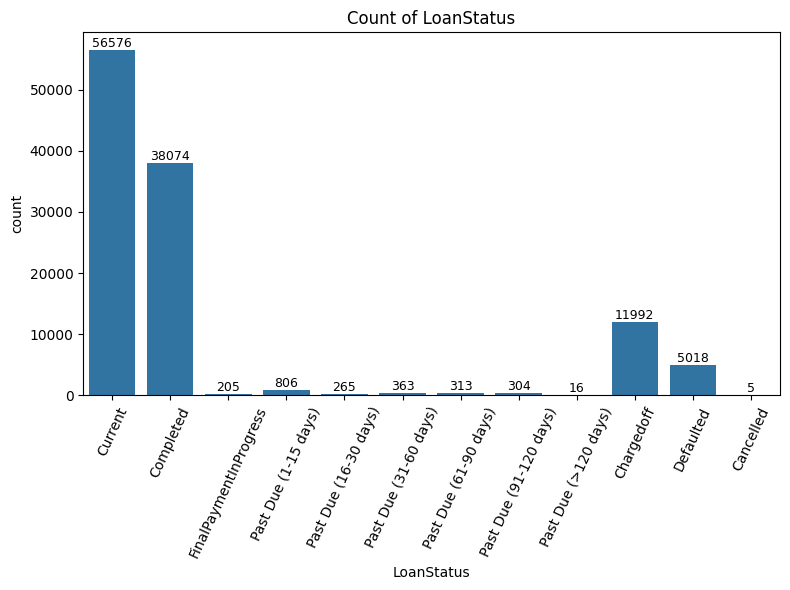

In [5]:
col = 'LoanStatus'
plt.figure(figsize=(8,6))
order = [
    'Current',
    'Completed', 
    'FinalPaymentInProgress',          
    'Past Due (1-15 days)',
    'Past Due (16-30 days)',
    'Past Due (31-60 days)',
    'Past Due (61-90 days)',
    'Past Due (91-120 days)',
    'Past Due (>120 days)',
    'Chargedoff',
    'Defaulted',                       
    'Cancelled'
]
ax = sns.countplot(data=df, x=col)
ax.set_title('Count of LoanStatus')
ax.set_xlabel('LoanStatus')
ax.set_ylabel('count')
plt.xticks(rotation=65)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)
safe_show()

**Observation:** The majority of loans are marked as *Current* or *Completed*, while a smaller portion are *Chargedoff* or *Defaulted*. This shows that most borrowers are still repaying or have successfully completed their loans.


## Bivariate Exploration


**Question:** Is there a relationship between loan size and APR?  
**Visualization:** Scatterplot of BorrowerAPR vs LoanOriginalAmount

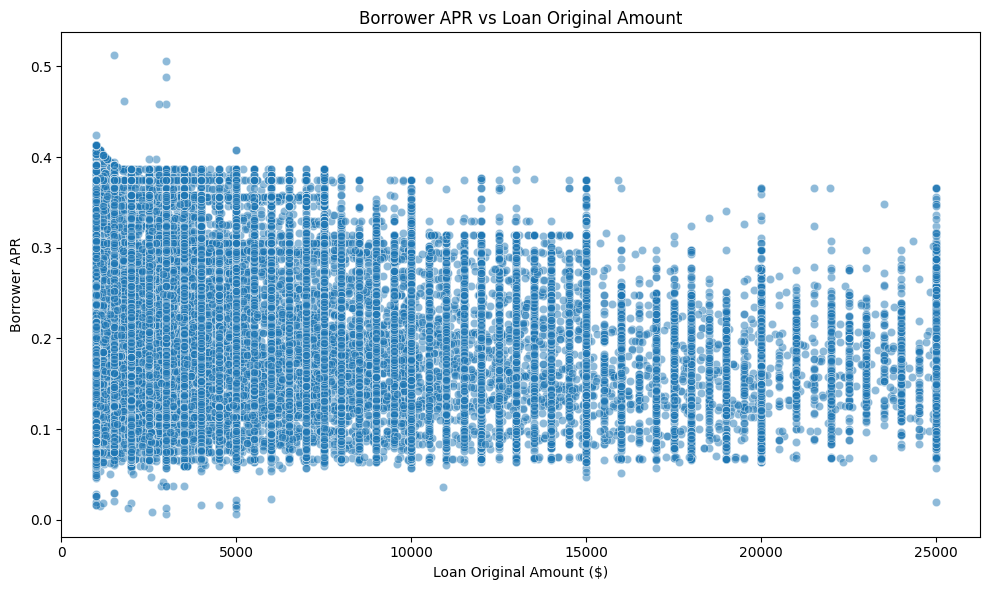

In [20]:
# Bivariate: Scatterplot of BorrowerAPR vs LoanOriginalAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoanOriginalAmount', y='BorrowerAPR', data=df, alpha=0.5)  
plt.title('Borrower APR vs Loan Original Amount')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower APR')
plt.xlim(0, df['LoanOriginalAmount'].max() * 1.05)  
safe_show()

**Observation:** APR slightly decreases as loan amounts increase. This suggests higher-value borrowers may have better credit profiles and receive lower interest rates.

**Question:** How does credit grade affect APR?  
**Visualization:** Boxplot of BorrowerAPR by CreditGrade  

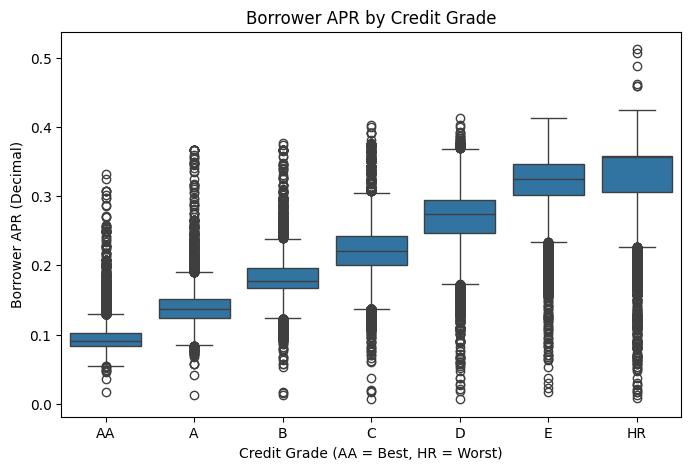

In [21]:
# Polished Box Plot (Bivariate)
plt.figure(figsize=(8, 5))
sns.boxplot(x='CreditGrade', y='BorrowerAPR', data=df, order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.title('Borrower APR by Credit Grade')
plt.xlabel('Credit Grade (AA = Best, HR = Worst)')
plt.ylabel('Borrower APR (Decimal)')
plt.show()

**Observation:** As credit grade worsens from A → HR, APRs increase sharply. Borrowers with an “HR” grade pay the highest rates, confirming that credit quality drives borrowing costs.


**Question:** Which numeric features are correlated?  
**Visualization:** Correlation heatmap  


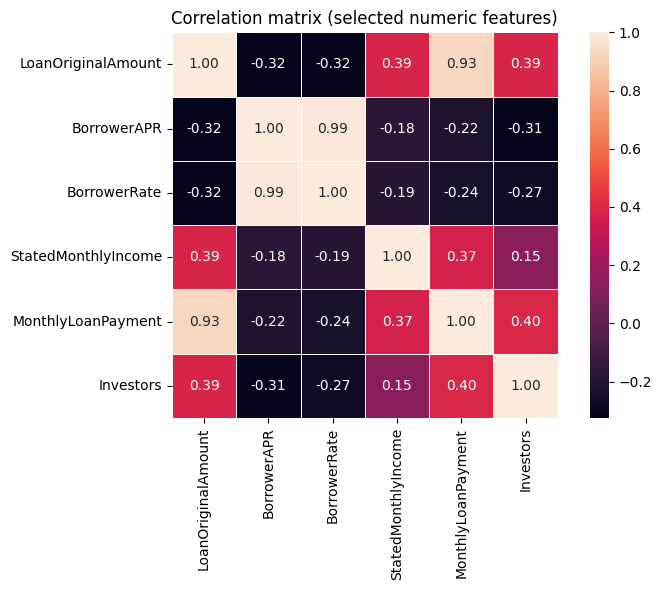

In [22]:
# Correlation heatmap (numeric)
corr_cols = [c for c in numeric_cols if c in df.columns]
corr = df[corr_cols].corr()
plt.figure(figsize=(8,6))
ax = sns.heatmap(corr, annot=True, fmt='.2f', square=True, linewidths=0.5)
ax.set_title('Correlation matrix (selected numeric features)')
safe_show()


**Observation:** LoanOriginalAmount and MonthlyLoanPayment are strongly correlated, which makes sense. BorrowerAPR and Investors show a weak negative relationship — higher rates may attract fewer investors.


## Multivariate Exploration


**Question:** Do larger loans tend to have higher or lower APRs?  
**Visualization:** Scatter plot of BorrowerAPR vs LoanOriginalAmount  

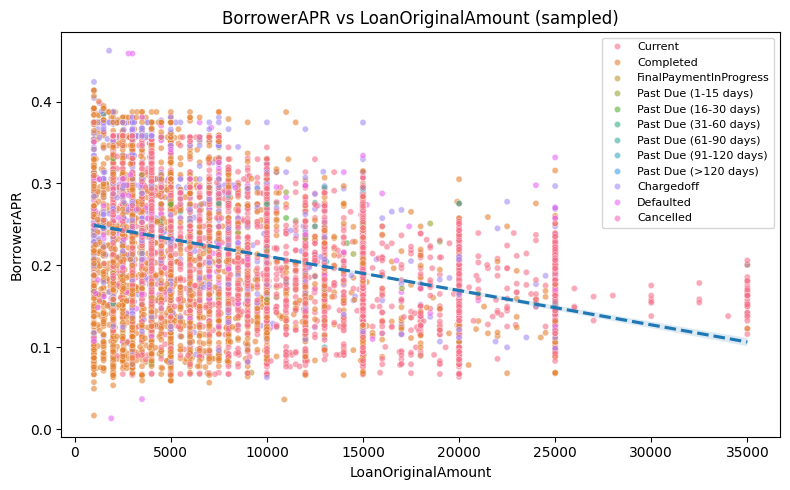

In [8]:
x = 'LoanOriginalAmount'
y = 'BorrowerAPR'

# sample to avoid overplotting
sample = df[[x, y, 'LoanStatus']].dropna().sample(min(10000, len(df)))
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=sample, x=x, y=y, hue='LoanStatus', alpha=0.6, s=20)
sns.regplot(data=sample, x=x, y=y, scatter=False, ax=ax, line_kws={'linestyle':'--'})
ax.set_title(f'{y} vs {x} (sampled)')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.legend(loc='best', fontsize=8)
safe_show()


**Observation:** APR slightly decreases as loan amounts increase. This suggests higher-value borrowers may have better credit profiles and receive lower interest rates.


**Question:** Does the APR–LoanAmount relationship vary by loan outcome?  
**Visualization:** FacetGrid of BorrowerAPR vs LoanOriginalAmount by LoanStatus  


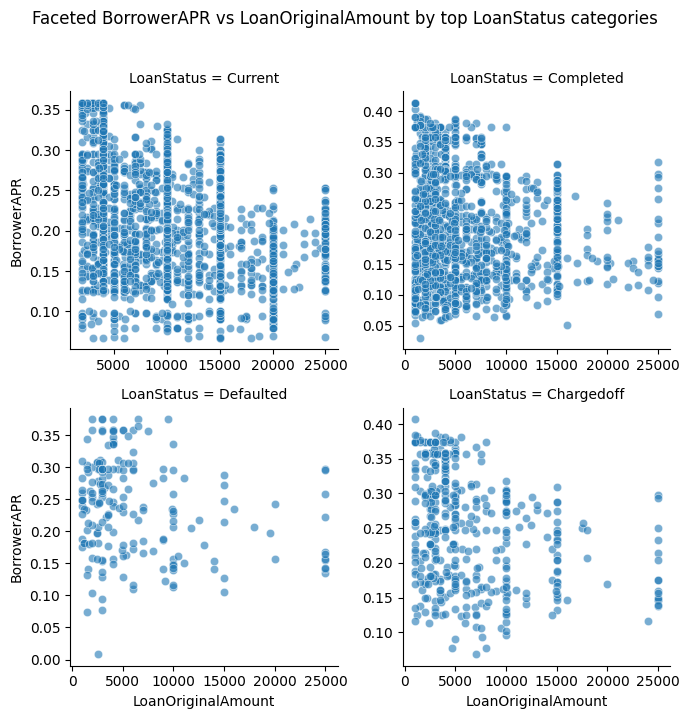

In [24]:

facet_col = 'LoanStatus'
x = 'LoanOriginalAmount'
y = 'BorrowerAPR'

# choose the top 4 statuses to facet
top_statuses = df[facet_col].value_counts().index[:4].tolist()
sub = df[df[facet_col].isin(top_statuses)][[x, y, facet_col]].dropna()

g = sns.FacetGrid(sub.sample(min(4000, len(sub))), col=facet_col, height=3.5, col_wrap=2, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x=x, y=y, alpha=0.6)
g.set_axis_labels(x, y)
g.fig.suptitle(f'Faceted {y} vs {x} by top {facet_col} categories', y=1.02)
safe_show()


**Observation:** Charged-off loans tend to cluster at higher APRs. Completed or Current loans have lower APRs, showing that higher interest loans are riskier.


**Question:** Are there broader relationships among numeric variables?  
**Visualization:** Pairplot (scatter matrix)  


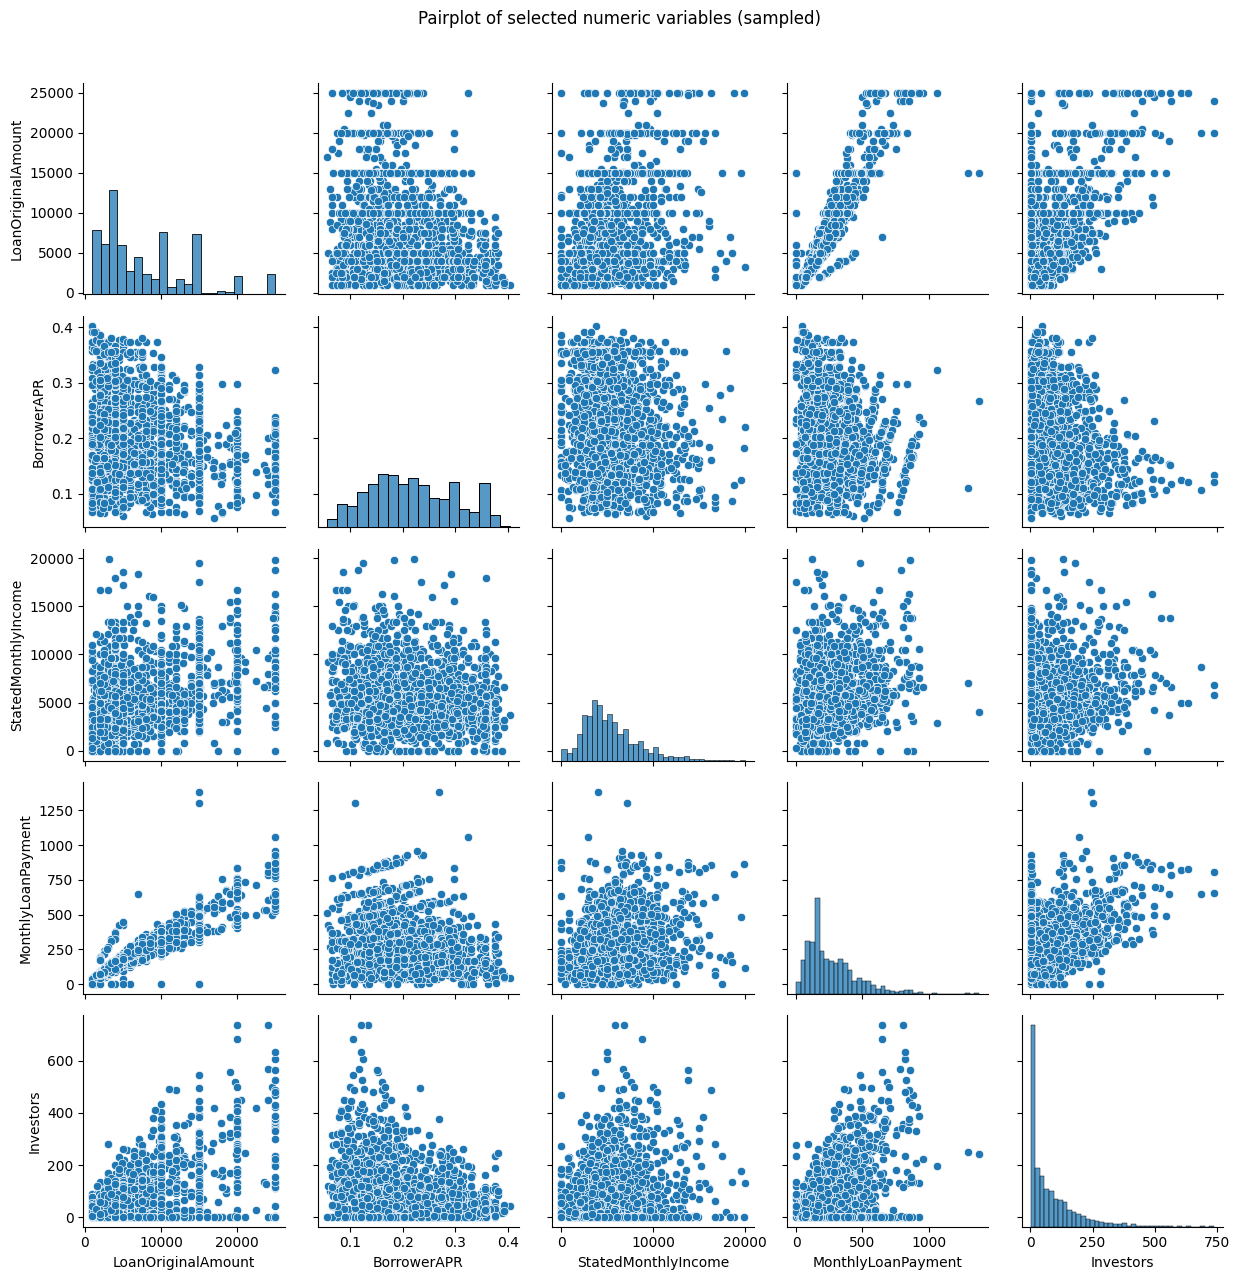

In [25]:
# Pairplot (plot matrix) - sample to reduce overplotting
pair_cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors']
pair_cols = [c for c in pair_cols if c in df.columns]
sample = df[pair_cols].dropna().sample(min(2000, len(df)))
sns.pairplot(sample, diag_kind='hist')
plt.suptitle('Pairplot of selected numeric variables (sampled)', y=1.02)
safe_show()


**Observation:** Income, loan size, and monthly payment are positively related. Investors are more frequent in medium-sized, lower-APR loans.


# Summary of Findings

### Key Insights
1. Borrower APRs are right-skewed — most borrowers pay moderate interest rates, with a few paying very high rates.
2. Credit grade strongly influences APR — higher risk grades face higher rates.
3. Larger loans tend to have slightly lower APRs.
4. Current and completed loans dominate the dataset, while charged-off loans are fewer but associated with higher APRs.
5. Monthly payments rise linearly with loan amount, indicating consistent loan term structures.

### Next Steps
- Model borrower risk using APR, CreditGrade, and LoanStatus.
- Explore time trends (LoanOriginationDate) for temporal insights.
